<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/pc_cl_km_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/PyCaret.png?raw=true)

# **Clustering**

## **Instalando PyCaret**

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Habilitando bibliotecas necesarias**

### **Para el tratamiento de los datos**

In [2]:
import pandas as pd
import numpy as np

### **PyCaret**

In [3]:
from pycaret.clustering import *

## **Extracción de Datos - Creación del DataFrame**

El dataframe contiene 5 variables y 400 observaciones. 

Las variables indican:
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es dependiente y 0 cuando es independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

Pero para el desarrollo del algoritmo se simplificara a un problema bidimensional, seleccionando las variables de edad y salario.

In [4]:
datos = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Clientes.csv"

In [5]:
datos = pd.read_csv(datos)
datos.head()

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No


### **Limpieza**

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
datos = datos.drop(columns=["ID","Trabajo","Compra"]) #se eliminan las variables no relevantes para este problema
datos.head(3) #vista del dataframe

,Edad,Salario
0,19,19000
1,35,20000
2,26,43000


In [8]:
datos.shape

(400, 2)

### **Dividiendo el conjunto de datos**

In [9]:
clientes = datos.sample(frac = 0.75, random_state=0)
clientes_no_vistos = datos.drop(clientes.index)

In [10]:
clientes.reset_index(inplace=True, drop=True)
clientes_no_vistos.reset_index(inplace=True, drop=True)

In [11]:
print("Datos para Modelar: " + str(clientes.shape))
print("Datos no vistos para Predicciones: " + str(clientes_no_vistos.shape))

Datos para Modelar: (300, 2)
Datos no vistos para Predicciones: (100, 2)


In [12]:
clientes.head()

,Edad,Salario
0,30,87000
1,38,50000
2,35,75000
3,30,79000
4,35,50000


In [13]:
clientes_no_vistos.head()

,Edad,Salario
0,35,65000
1,47,20000
2,29,43000
3,27,137000
4,21,16000


# **Configuración del entorno en PyCaret**

***La función ```setup()``` inicializa el entorno en PyCaret y prepara los datos para el modelo seleccionado y la implementación de ese modelo. La función ```setup()``` debe ser llamada antes de ejecutar cualquier función de PyCaret.*** 

***Se necesitan dos parámetros obligatorios:***
- Un marco de datos de Pandas y, 
- el nombre de la columna de destino. 

***Todos los demás parámetros son opcionales y se utilizan para personalizar el preprocesamiento de los datos.***

Cuando se ejecuta ```setup()```, el algoritmo de inferencia de PyCaret determina automáticamente los tipos de datos para todas las funciones en función de determinadas propiedades. 

El tipo de datos debe inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de que se ejecuta ```setup()```. 

Si todos los tipos de datos están identificados correctamente, se debe presionar enter para continuar o se puede ingresar salir para finalizar la experiencia. Asegurarse de que los tipos de datos sean correctos es  fundamental, ya que se realiza automáticamente algunas tareas de preprocesamiento que son imperativas para cualquier experimento de aprendizaje automático. 

Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén configuradas correctamente.

In [14]:
agrupacion = setup(clientes, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(300, 2)"
2,Transformed data shape,"(300, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,CPU Jobs,-1


***Una vez que la configuración se ha ejecutado con éxito, se muestra un cuadro de información que contiene elementos importantes. La mayor parte de la información está relacionada con el preprocesamiento que se construye cuando se ejecuta ```setup()```.*** 

# **Creación del Modelo**

In [15]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [16]:
print(f"Hay {len(models())} algoritmos para clustering")

Hay 9 algoritmos para clustering


## **Algoritmo K-means**

In [17]:
km = create_model('kmeans', num_clusters=4)
print(km)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6103,1320.0243,0.4538,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=123)


# **Asignando el Modelo**

**Ahora que hemos creado un modelo, nos gustaría asignar las etiquetas de grupo a nuestro conjunto de datos ($300$ muestras) para analizar los resultados. Lo lograremos usando la función ```assign_model()```.**

In [18]:
km_resultados = assign_model(km)
km_resultados.head()

,Edad,Salario,Cluster
0,30,87000,Cluster 0
1,38,50000,Cluster 3
2,35,75000,Cluster 0
3,30,79000,Cluster 0
4,35,50000,Cluster 3


In [19]:
km_resultados.shape

(300, 3)

# **Evaluación del Modelo**

In [20]:
evaluate_model(km)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Visualización del Modelo**

**La función ```plot_model()``` se puede utilizar para analizar diferentes aspectos del 
modelo de agrupamiento. Esta función toma un objeto de modelo entrenado y devuelve un gráfico.**

## **Visualización de los clusters**

In [21]:
plot_model(km)

## **Visualización del Codo**

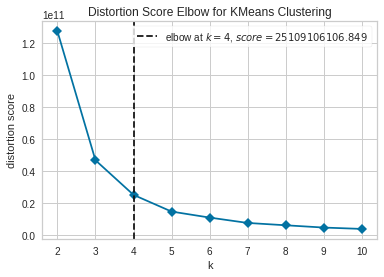

In [22]:
plot_model(km, plot = 'elbow')

## **Visualización de la Silueta**

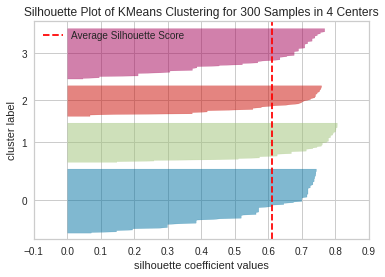

In [23]:
plot_model(km, plot = 'silhouette')

## **Visualización de la Distribución**

La gráfica de distribución muestra el tamaño de cada grupo. Al pasar el cursor sobre las barras, verá el número de muestras asignadas a cada grupo. En el ejemplo anterior, podemos observar que el grupo 3 tiene el mayor número de muestras. También podemos usar la gráfica de distribución para ver la distribución de etiquetas de clusters en asociación con cualquier otra característica numérica o categórica. 

In [24]:
plot_model(km, plot = 'distribution')

***También podemos usar la misma gráfica para ver la distribución de cualquier característica continua. Vea un ejemplo a continuación:***

In [25]:
plot_model(km, plot = 'distribution', feature = 'Edad')

In [26]:
plot_model(km, plot = 'distribution', feature = 'Salario')

# **Predecir sobre datos no disponibles**

In [27]:
clientes_no_vistos_prediccion = predict_model(km, data=clientes_no_vistos)
clientes_no_vistos_prediccion.head()

,Edad,Salario,Cluster
0,35.0,65000.0,Cluster 3
1,47.0,20000.0,Cluster 1
2,29.0,43000.0,Cluster 3
3,27.0,137000.0,Cluster 2
4,21.0,16000.0,Cluster 1


# **Guardando el modelo**

In [28]:
#save_model(km,"/content/drive/MyDrive/Modelos/modelo_km_PyCaret")

# **Accediendo al modelo guardado**

In [29]:
#saved_km = load_model("/content/drive/MyDrive/Modelos/modelo_km_PyCaret")

In [30]:
#nueva_prediccion = predict_model(saved_km, data=clientes_no_vistos)
#nueva_prediccion.head()